In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\arjunbhasin2013\ccdata\versions\1


In [2]:
df = pd.read_csv(path+'\\CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df3 = df

df3 = df3.dropna(subset=['CREDIT_LIMIT'])
df3 = df3.dropna(subset=['MINIMUM_PAYMENTS'])
df3 = df3.drop(['CUST_ID'], axis = 1)
df3['TENURE-6'] = df3['TENURE'] - 6
df3 = df3.drop(['TENURE'], axis = 1)

df3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE-6
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,6
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [7]:
from sklearn.preprocessing import MinMaxScaler

X = df3.to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_dataset = scaler.fit_transform(X)
X_scal = scaler_dataset
X_scal

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

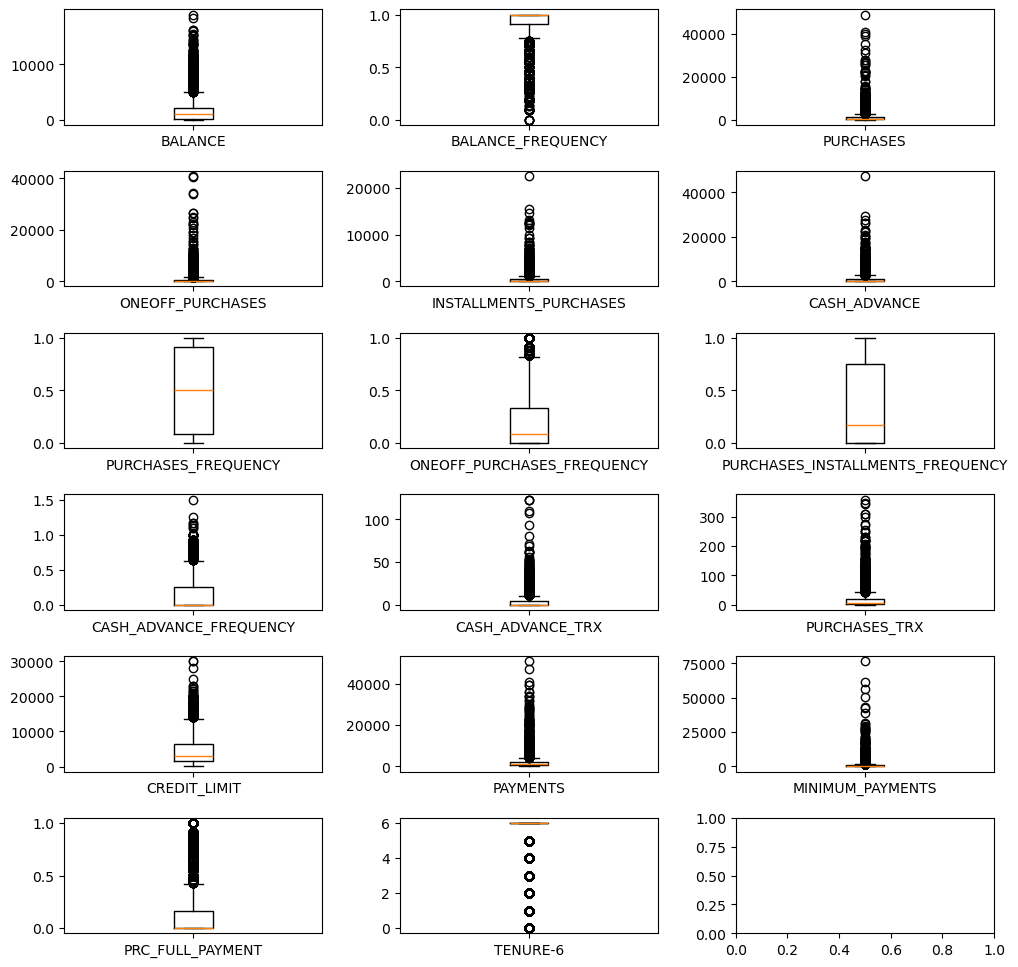

In [8]:
labels = df3.columns.to_list()

fig, ax = plt.subplots(6, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(17):
    ax[i // 3, i % 3].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

In [18]:
Counter(df3['TENURE-6']) #хоть и выглядет подозрительно на графиках выше, но лучше оставить

Counter({6: 7346, 5: 356, 4: 226, 0: 184, 2: 183, 1: 177, 3: 164})

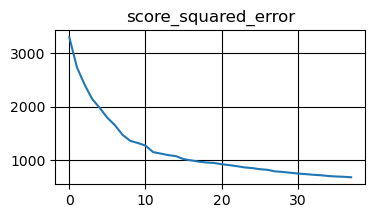

In [57]:
from sklearn.cluster import KMeans
#import warnings

#warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")

arr_score = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

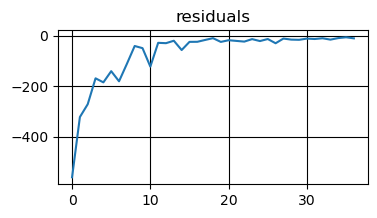

In [58]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i + 1] - arr_score[i]
    residual_arr.append(res)

plt.figure(figsize = (4, 2))
plt.title('residuals')
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

In [67]:
#лучше всего выбирать n_clusters = 8, но для простоты дальнейшего анализа будем выбирать 4 кластера

In [68]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
score = kmeans.inertia_
Counter(kmeans.labels_)

Counter({np.int32(1): 4344,
         np.int32(0): 2154,
         np.int32(2): 1243,
         np.int32(3): 895})

In [69]:
from sklearn.cluster import DBSCAN

arr_score_dbskan = []

for i in range(1, 6):
    temp = []
    for j in range(1, 4):
        clustering = DBSCAN(eps = i / 5, min_samples = j).fit(X_scal)
        score = [Counter(clustering.labels_)[0], len(Counter(clustering.labels_))] #по идее, чем меньше кластеров и меньше элементов в самом крупном кластере, тем лучше
        temp.append(score)
    arr_score_dbskan.append(temp)

In [70]:
arr_score_dbskan #вариант с [8524, 4] выглядит самым привлекательным

[[[7378, 1076], [7378, 103], [7378, 39]],
 [[8524, 97], [8524, 13], [8524, 4]],
 [[8611, 25], [8611, 3], [8611, 2]],
 [[8629, 8], [8629, 2], [8629, 2]],
 [[8635, 2], [8635, 2], [8635, 2]]]

In [79]:
# как и в прошлый раз, выберем 4 кластера, т.к. этот метод работает и так лучше всех (по наполняемости)
from sklearn.cluster import AgglomerativeClustering

clustering_tree = AgglomerativeClustering(n_clusters = 4).fit(X_scal)
Counter(clustering_tree.labels_)

Counter({np.int64(1): 3488,
         np.int64(2): 2209,
         np.int64(0): 1992,
         np.int64(3): 947})

In [80]:
# Если составлять топ, то для данного датасета лучшие результаты имеет 1) иерархическая кластеризация, 2) K-Mean, 3) DBSCAN

Text(0.5, 1.0, 'explained_variance')

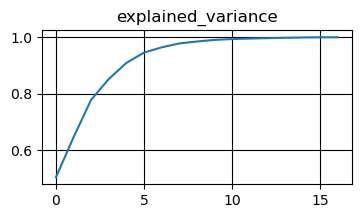

In [170]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scal)

plt.figure(figsize = (4, 2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True, color = 'k')
plt.title('explained_variance')

In [ ]:
#вывод: можно спокойно только выбирать первые 10 элементов

In [86]:
pca = PCA(n_components = 10).fit(X_scal)
X_transformed = pca.fit_transform(X_scal)

In [93]:
kmeans2 = KMeans(n_clusters = 4, random_state = 0, n_init = "auto", max_iter = 500).fit(X_transformed)

print('кластера по K-Mean до уменьшения размерности :\t\t', Counter(kmeans.labels_))
print('кластера по K-Mean после уменьшения размерности :\t', Counter(kmeans2.labels_))

кластера по K-Mean до уменьшения размерности :		 Counter({np.int32(1): 4344, np.int32(0): 2154, np.int32(2): 1243, np.int32(3): 895})
кластера по K-Mean после уменьшения размерности :	 Counter({np.int32(2): 4345, np.int32(0): 2146, np.int32(1): 1249, np.int32(3): 896})


In [92]:
#Разницы почти нет

In [94]:
clustering = DBSCAN(eps = 2 / 5, min_samples = 3).fit(X_scal)
clustering2 = DBSCAN(eps = 2 / 5, min_samples = 3).fit(X_transformed)

print('кластера по DBSCAN до уменьшения размерности :\t\t', Counter(clustering.labels_))
print('кластера по DBSCAN после уменьшения размерности :\t', Counter(clustering2.labels_))

кластера по DBSCAN до уменьшения размерности :		 Counter({np.int64(0): 8524, np.int64(-1): 103, np.int64(2): 6, np.int64(1): 3})
кластера по DBSCAN после уменьшения размерности :	 Counter({np.int64(0): 8558, np.int64(-1): 63, np.int64(1): 6, np.int64(4): 3, np.int64(2): 3, np.int64(3): 3})


In [ ]:
#кластеров сталло больше, что не хорошо

In [95]:
clustering_tree2 = AgglomerativeClustering(n_clusters = 4).fit(X_transformed)

print('кластера по DBSCAN до уменьшения размерности :\t\t', Counter(clustering_tree.labels_))
print('кластера по DBSCAN после уменьшения размерности :\t', Counter(clustering_tree2.labels_))

кластера по DBSCAN до уменьшения размерности :		 Counter({np.int64(1): 3488, np.int64(2): 2209, np.int64(0): 1992, np.int64(3): 947})
кластера по DBSCAN после уменьшения размерности :	 Counter({np.int64(1): 4431, np.int64(3): 2209, np.int64(0): 1201, np.int64(2): 795})


In [ ]:
#полнота кластеров стала хуже, что не хорошо

In [97]:
class my_PCA:

    def __init__(self, n_components = None):

        self.n_components = n_components
        self.components = None  # Главные компоненты (собственные векторы)
        self.explained_variance = None  # для графиков дисперсии
        self.mean = None  # Средние значения признаков
        
    def fit(self, X):
        
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        n_samples = X.shape[0]
        cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]
            
        self.components = eigenvectors
        self.explained_variance = eigenvalues
        
        return self
    
    def transform(self, X):
            
        X_centered = X - self.mean
        X_transformed = X_centered @ self.components
        
        return X_transformed
    
    def fit_transform(self, X):
        
        self.fit(X)
        return self.transform(X)
    
    def explained_variance_ratio(self):

        total_variance = np.sum(self.explained_variance)
        return self.explained_variance / total_variance

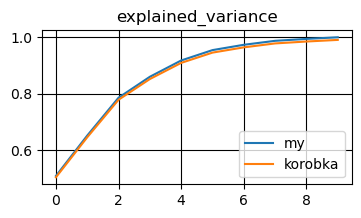

In [169]:
my_pca = my_PCA(n_components = 10)
X_my_transform = my_pca.fit_transform(X_scal)

plt.figure(figsize = (4, 2))
plt.plot(np.cumsum(my_pca.explained_variance_ratio()), '-', label = 'my')
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-', label = 'korobka')
plt.title('explained_variance')
plt.legend()
plt.grid(True, color = 'k')

In [105]:
arr_points = []

for i in range(10):
    temp = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            temp.append(X[j])
    arr_points.append(temp)

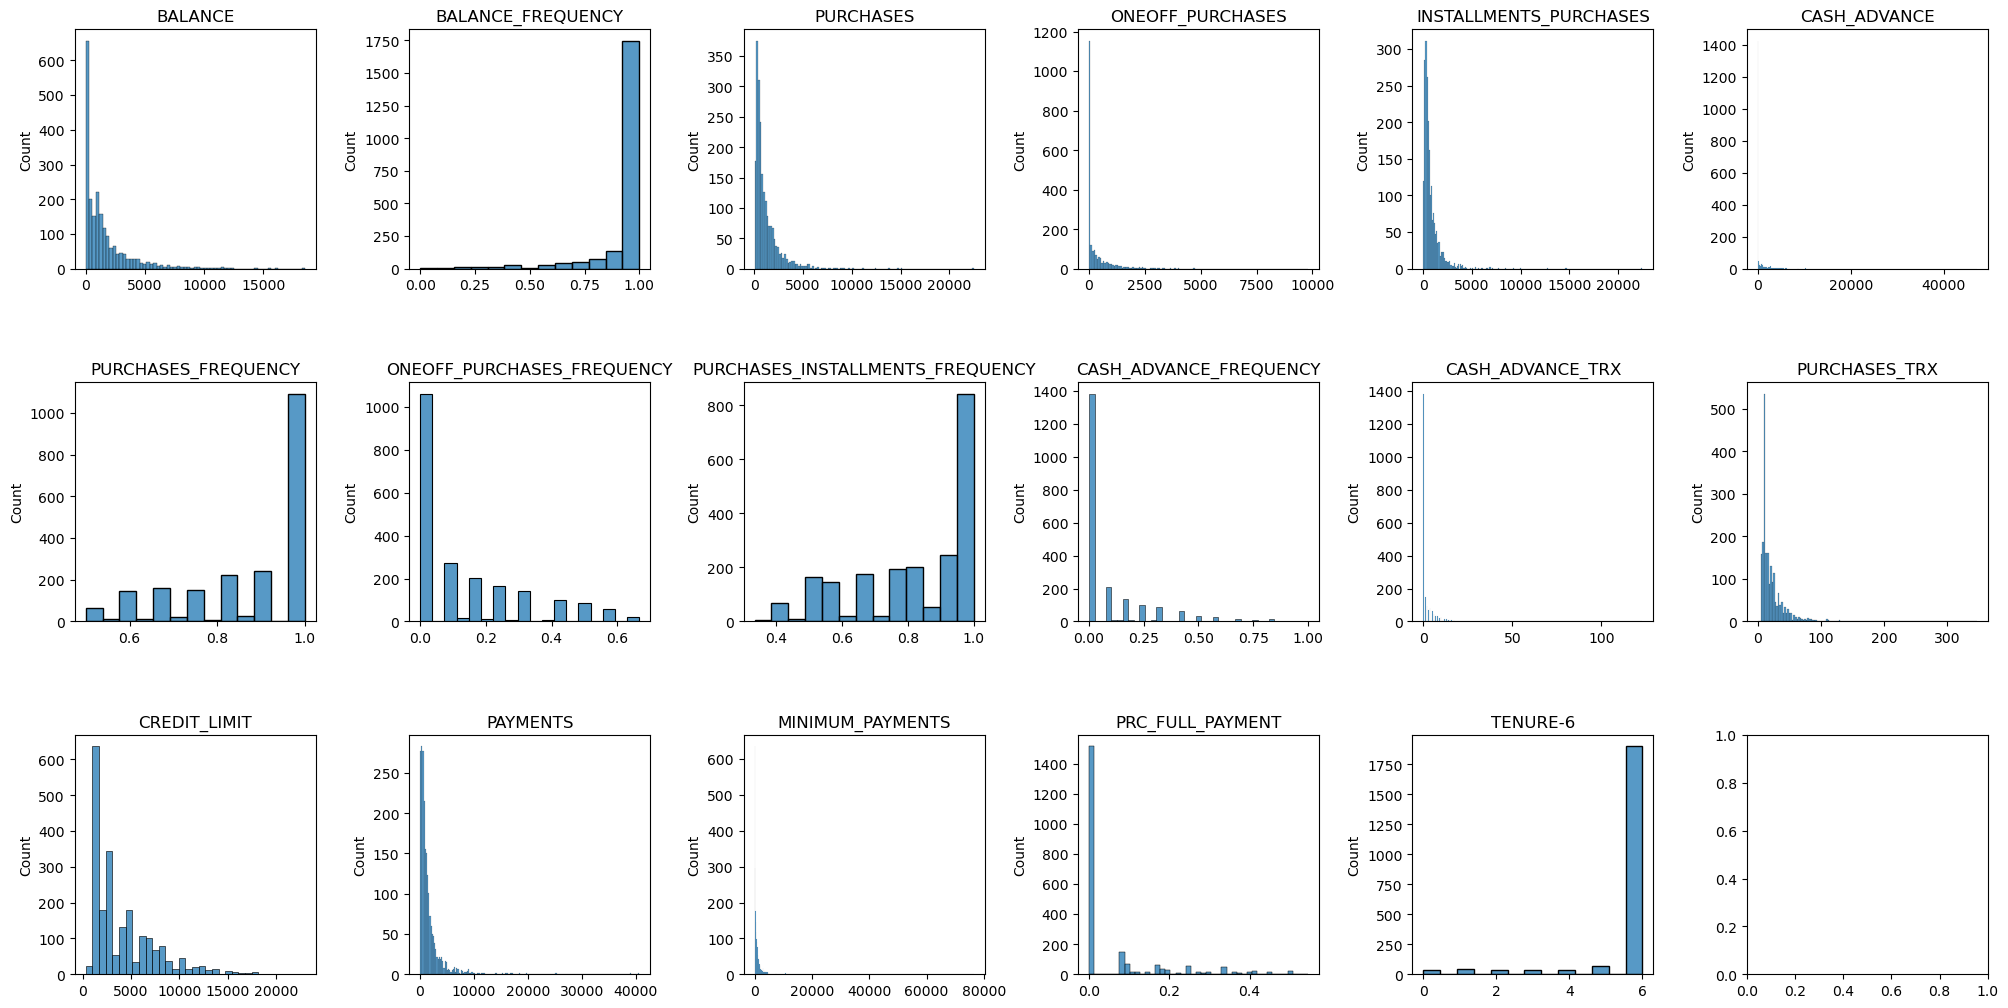

In [167]:
labels = df3.columns
arr = np.array(arr_points[0])

fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
axs = axs.flatten()

for i in range(arr.shape[1]):
    seaborn.histplot(arr[:, i], ax=axs[i])
    axs[i].set_title(labels[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [168]:
for i in range(4):
    arr = np.array(arr_points[i])
    min_num = np.min(arr, axis = 0)
    max_num = np.max(arr, axis = 0)
    step = (max_num - min_num) / 20
    print(f"---кластер №{i}---")
    for j in range(len(labels)):
        ranges = np.linspace(min_num[j], max_num[j], 10)
        bin_indices = np.digitize(arr[:, j], ranges)
        arr_frec = Counter(bin_indices)
        most_common_items = arr_frec.most_common()
        if len(most_common_items) >= 2:
            arr_el = []
            arr_count = []
            for k in range(len(most_common_items)):
                element0, count0 = most_common_items[k]
                arr_el.append(round(float(element0), 3))
                arr_count.append(count0)
            k_max = 1 + round(0.25 * len(most_common_items))
            arr_el_final = []
            for k in range(k_max):
                sum_left = 0
                sum_right = 0
                for t in range(k + 1):
                    sum_left += arr_count[t]
                for t in range(k + 1, len(most_common_items)):
                    sum_right += arr_count[t]
                ratio = sum_left / sum_right
                arr_el_final.append(round(float(ranges[int(arr_el[k]) - 1]), 3))
                if ratio > 1:
                    print(f"основной признак {labels[j]}: в окрестности {arr_el_final} c шагом {step[j]}")
                    break

---кластер №0---
основной признак BALANCE: в окрестности [0.0] c шагом 924.7779275
основной признак BALANCE_FREQUENCY: в окрестности [1.0] c шагом 0.05
основной признак PURCHASES: в окрестности [12.0] c шагом 1124.4
основной признак ONEOFF_PURCHASES: в окрестности [0.0] c шагом 490.2865
основной признак INSTALLMENTS_PURCHASES: в окрестности [9.65] c шагом 1124.5175
основной признак CASH_ADVANCE: в окрестности [0.0] c шагом 2356.860588
основной признак PURCHASES_FREQUENCY: в окрестности [1.0] c шагом 0.025
основной признак ONEOFF_PURCHASES_FREQUENCY: в окрестности [0.0, 0.074] c шагом 0.03333335
основной признак PURCHASES_INSTALLMENTS_FREQUENCY: в окрестности [1.0, 0.852] c шагом 0.03333335
основной признак CASH_ADVANCE_FREQUENCY: в окрестности [0.0] c шагом 0.05
основной признак CASH_ADVANCE_TRX: в окрестности [0.0] c шагом 6.15
основной признак PURCHASES_TRX: в окрестности [0.0] c шагом 17.35
основной признак CREDIT_LIMIT: в окрестности [300.0, 2822.222] c шагом 1135.0
основной призна